In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

print("All libraries loaded successfully!")


All libraries loaded successfully!


In [3]:
from google.colab import files

uploaded = files.upload()  # Choose the CSV file you just downloaded


Saving kaggle.json to kaggle (1).json


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Download Heart Disease UCI dataset from Kaggle
!kaggle datasets download -d cherngs/heart-disease-cleveland-uci

# Unzip the downloaded file
!unzip heart-disease-cleveland-uci.zip


Dataset URL: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
License(s): reddit-api
  0% 0.00/3.33k [00:00<?, ?B/s]
100% 3.33k/3.33k [00:00<00:00, 8.83MB/s]
Archive:  heart-disease-cleveland-uci.zip
  inflating: heart_cleveland_upload.csv  


In [8]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("heart.csv")
print("Dataset loaded successfully!")
df.head()


Dataset loaded successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [9]:
# Get general info about dataset
df.info()

# Check first 5 rows
df.head()

# Check for missing values
df.isnull().sum()

# Statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [10]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values (numerical → median, categorical → mode)
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

# Encode categorical columns
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

print("Dataset cleaned and encoded successfully!")
df.head()


Dataset cleaned and encoded successfully!


/tmp/ipython-input-2071216077.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


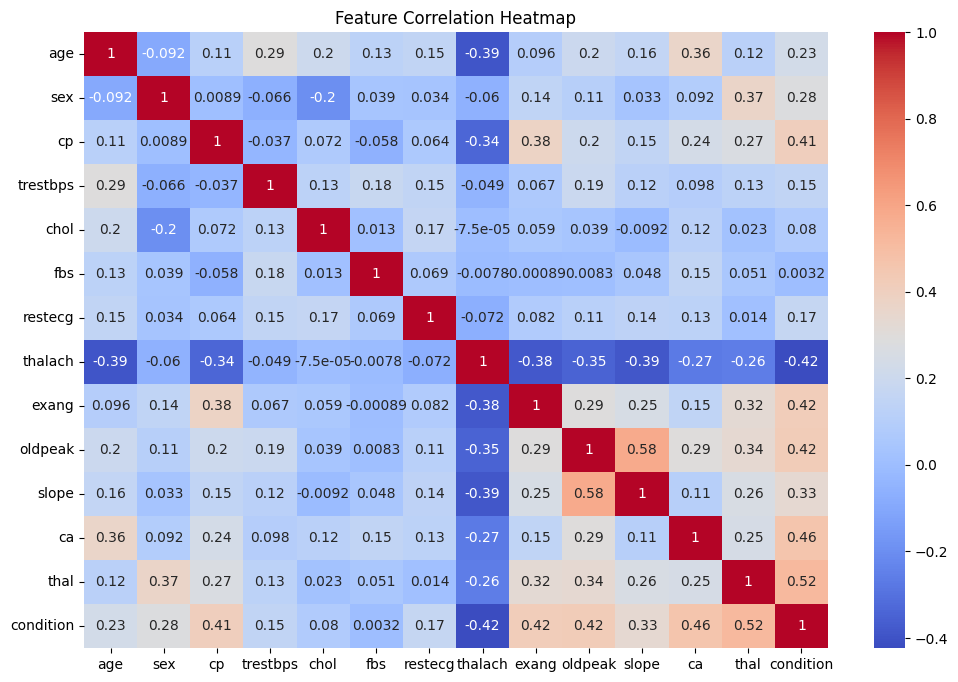

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


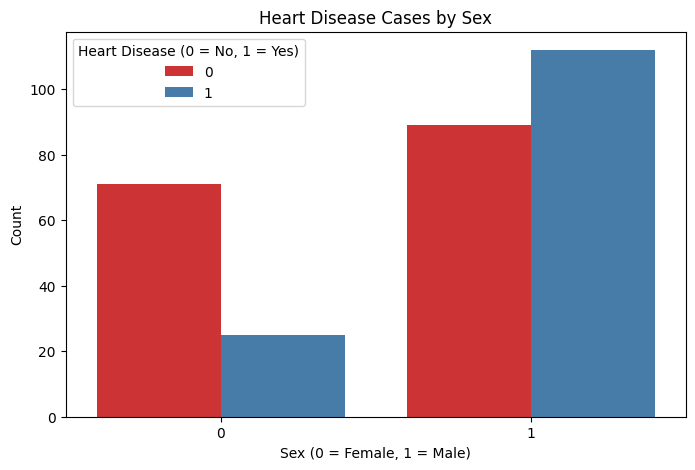

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='sex', hue='condition', data=df, palette='Set1')
plt.title('Heart Disease Cases by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')
plt.show()


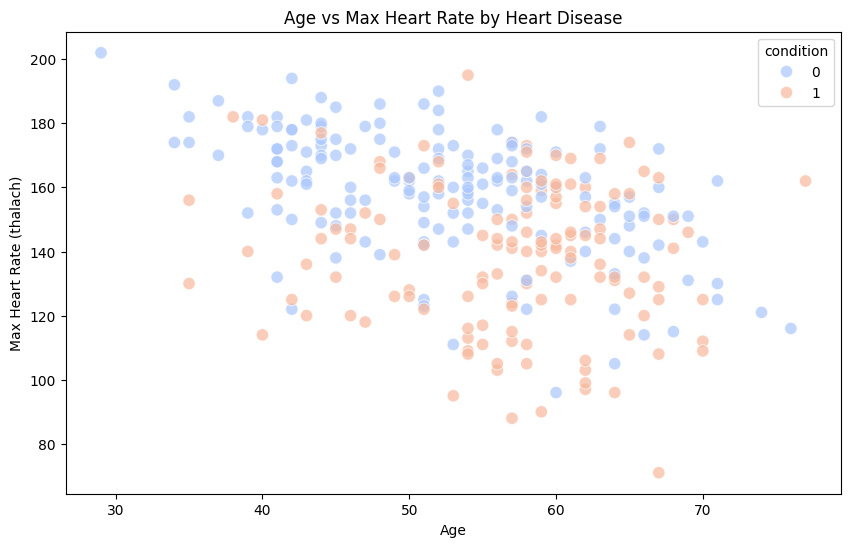

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='thalach', hue='condition', data=df, palette='coolwarm', s=80, alpha=0.7)
plt.title('Age vs Max Heart Rate by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.show()


<Figure size 1200x800 with 0 Axes>

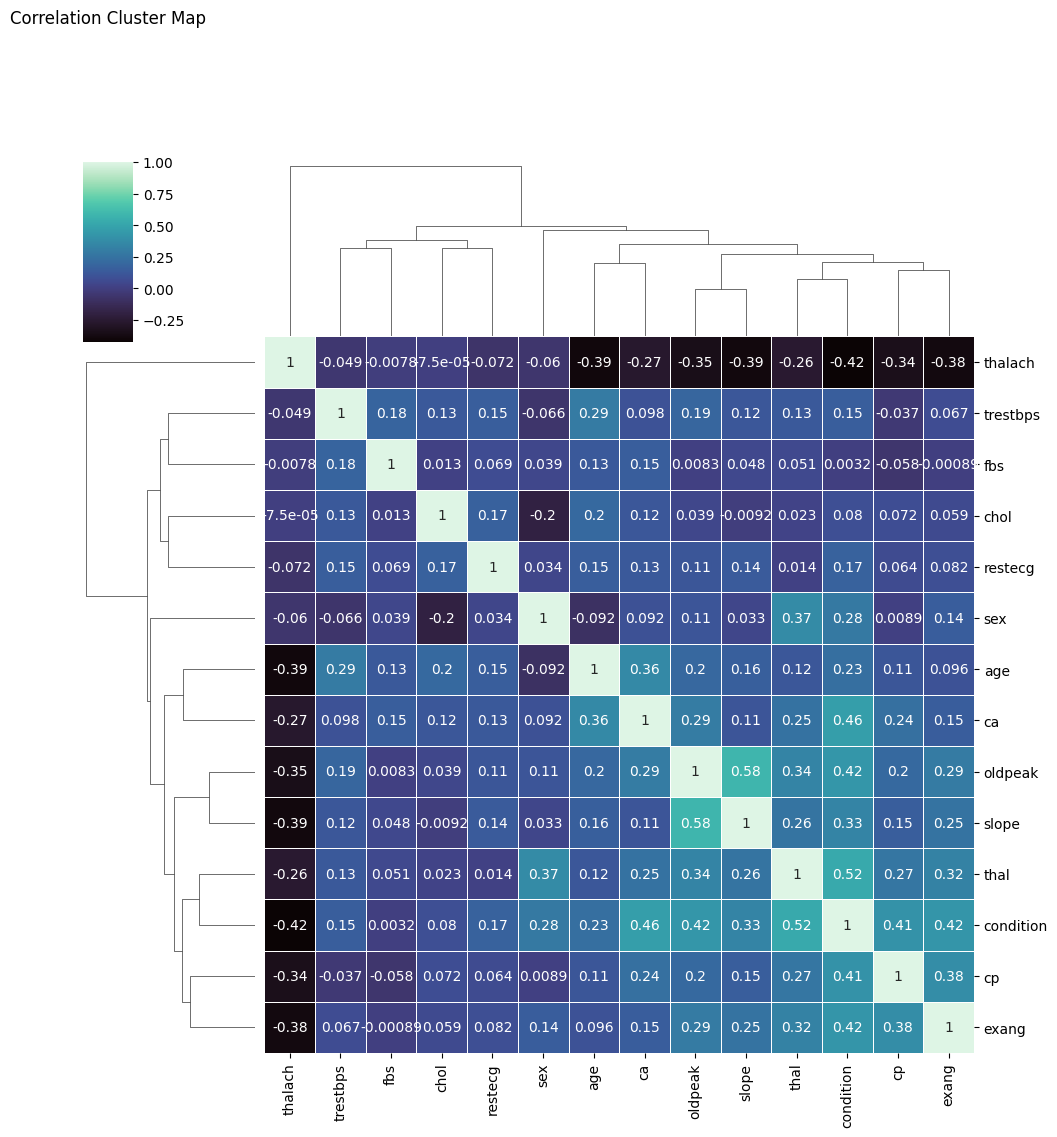

In [16]:
plt.figure(figsize=(12,8))
sns.clustermap(df.corr(), annot=True, cmap='mako', linewidths=0.5)
plt.title('Correlation Cluster Map', pad=100)
plt.show()


In [17]:
# Features and target
X = df.drop('condition', axis=1)  # all columns except target
y = df['condition']               # target column


In [18]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 237, Testing samples: 60


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
logreg = LogisticRegression()
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train models
logreg.fit(X_train_scaled, y_train)
dtree.fit(X_train, y_train)  # Decision Tree works well without scaling
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {'Logistic Regression': logreg, 'Decision Tree': dtree, 'Random Forest': rf}

for name, model in models.items():
    if name == 'Logistic Regression':
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Logistic Regression Evaluation:
Accuracy: 0.73
Precision: 0.70
Recall: 0.75
F1 Score: 0.72
Confusion Matrix:
[[23  9]
 [ 7 21]]

Decision Tree Evaluation:
Accuracy: 0.77
Precision: 0.73
Recall: 0.79
F1 Score: 0.76
Confusion Matrix:
[[24  8]
 [ 6 22]]

Random Forest Evaluation:
Accuracy: 0.70
Precision: 0.67
Recall: 0.71
F1 Score: 0.69
Confusion Matrix:
[[22 10]
 [ 8 20]]


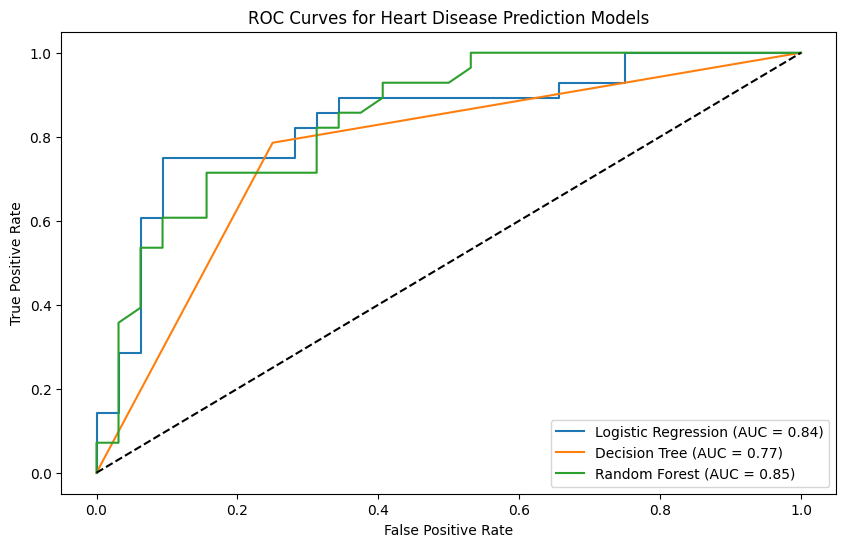

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Logistic Regression
y_pred_prob_logreg = logreg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_logreg)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_prob_logreg):.2f})')

# Decision Tree
y_pred_prob_dtree = dtree.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_dtree)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_pred_prob_dtree):.2f})')

# Random Forest
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_prob_rf):.2f})')

# Plot formatting
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.title('ROC Curves for Heart Disease Prediction Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [23]:
!pip install streamlit
!pip install pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.1 MB/s eta 0:00:00


In [24]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

# Load trained Random Forest model and scaler
model = pickle.load(open("rf_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

st.title("Heart Disease Prediction App")

st.write("""
Enter your health details below to predict the risk of heart disease:
""")

# User inputs
age = st.number_input("Age", min_value=1, max_value=120, value=30)
sex = st.selectbox("Sex", [0,1])  # 0 = Female, 1 = Male
cp = st.number_input("Chest Pain Type (0-3)", min_value=0, max_value=3, value=0)
trestbps = st.number_input("Resting Blood Pressure", min_value=80, max_value=200, value=120)
chol = st.number_input("Cholesterol", min_value=100, max_value=600, value=200)
fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", [0,1])
restecg = st.number_input("Resting ECG (0-2)", min_value=0, max_value=2, value=0)
thalach = st.number_input("Max Heart Rate Achieved", min_value=60, max_value=250, value=150)
exang = st.selectbox("Exercise Induced Angina", [0,1])
oldpeak = st.number_input("ST depression induced by exercise", min_value=0.0, max_value=10.0, value=0.0)
slope = st.number_input("Slope of ST segment (0-2)", min_value=0, max_value=2, value=0)
ca = st.number_input("Number of Major Vessels (0-3)", min_value=0, max_value=3, value=0)
thal = st.number_input("Thalassemia (0-3)", min_value=0, max_value=3, value=0)

# Prediction button
if st.button("Predict"):
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg,
                            thalach, exang, oldpeak, slope, ca, thal]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)

    if prediction[0] == 1:
        st.error("High risk of heart disease! ⚠️")
    else:
        st.success("Low risk of heart disease 🙂")


Writing app.py


In [25]:
import pickle

# Save Random Forest model
pickle.dump(rf, open("rf_model.pkl", "wb"))

# Save scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))


In [26]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.226.197:8501

  Stopping...
^C


In [27]:
from pyngrok import ngrok
public_url = ngrok.connect(port='8501')
public_url


ERROR:pyngrok.process.ngrok:t=2025-08-27T15:50:30+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-08-27T15:50:30+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-08-27T15:50:30+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.